In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [78]:
data=pd.read_csv("Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [79]:
data1=pd.get_dummies(data,columns=['Urban','US'],drop_first=True)

In [80]:
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [81]:
data1['ShelveLoc']=data1['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
data1


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


In [82]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_Yes    400 non-null    uint8  
 10  US_Yes       400 non-null    uint8  
dtypes: float64(1), int64(8), uint8(2)
memory usage: 29.0 KB


In [83]:
data1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,2.027500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.672961,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,1.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,2.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,3.000000,80.000000,18.000000,1.000000,1.000000


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

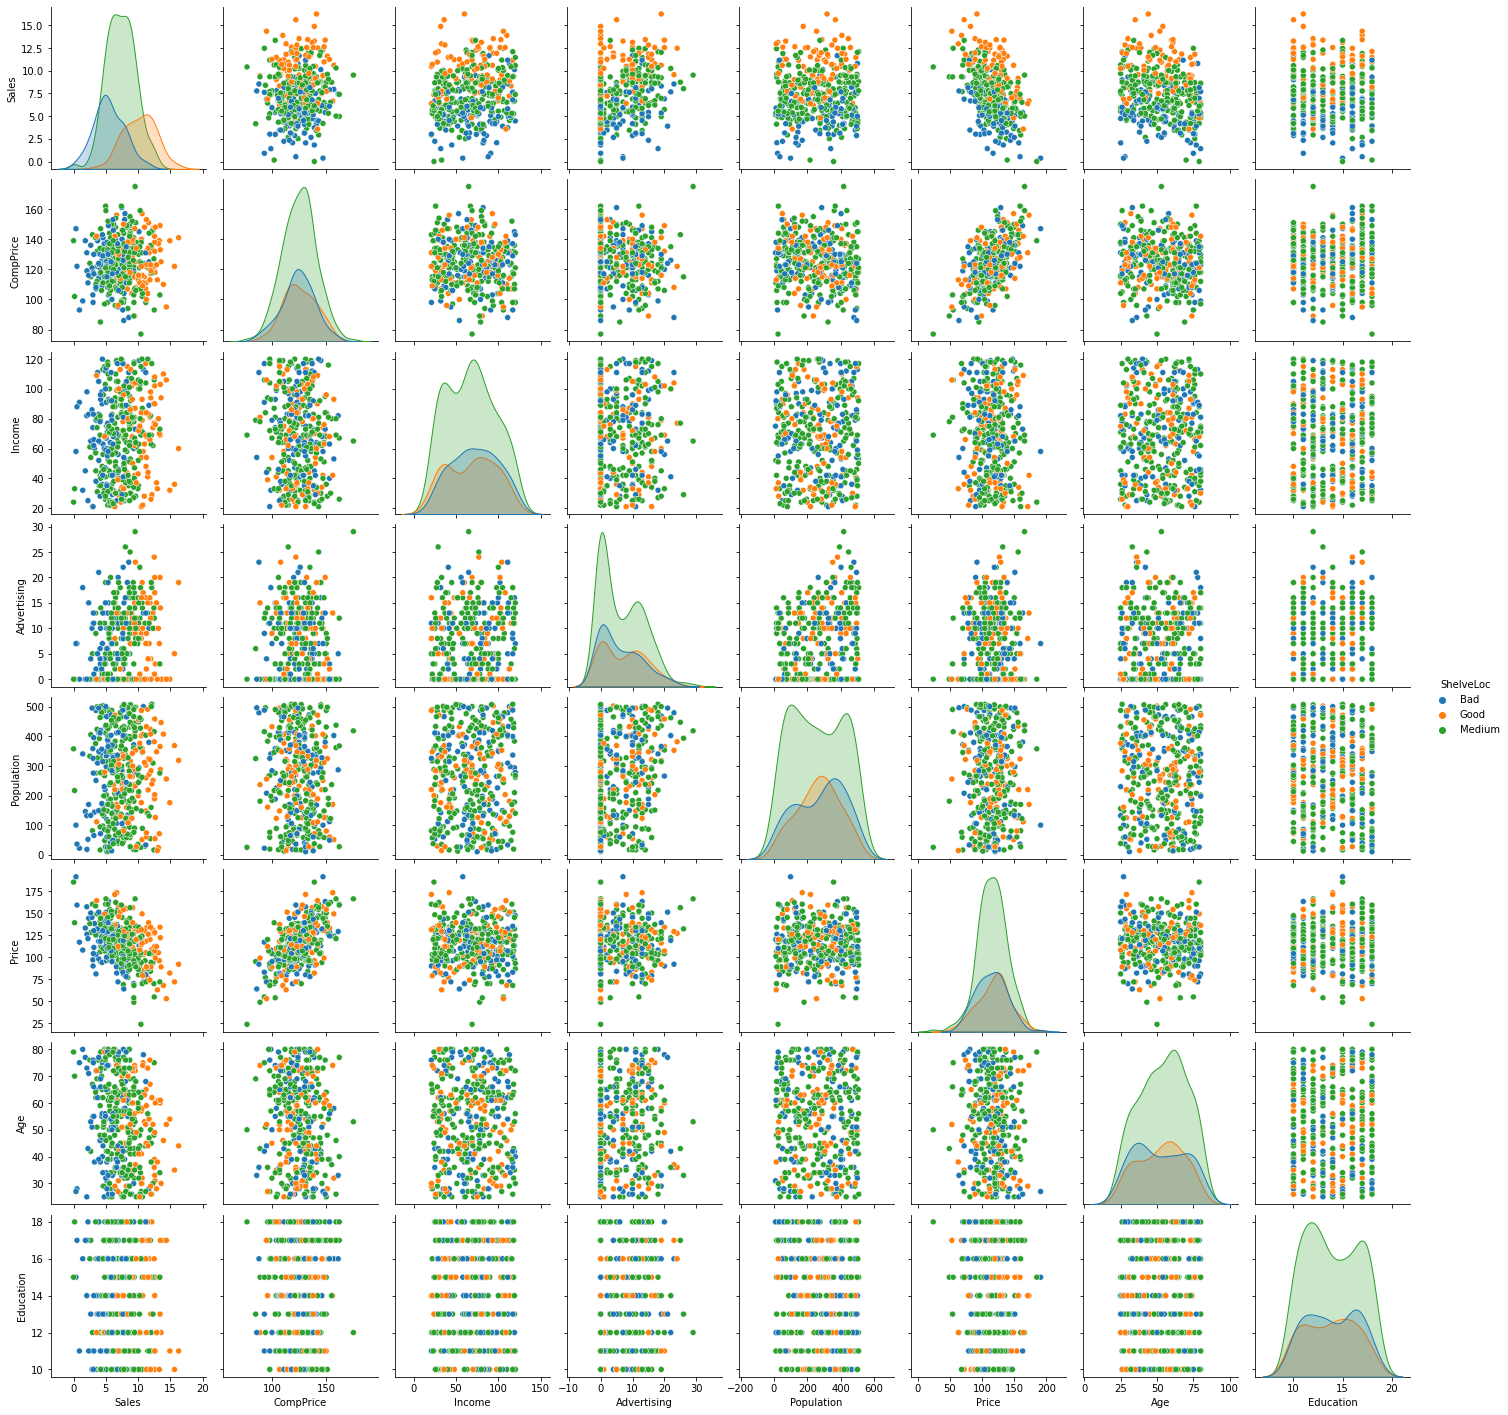

In [84]:
sns.pairplot(data=data,hue='ShelveLoc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd594aebc10>,
      dtype=object)

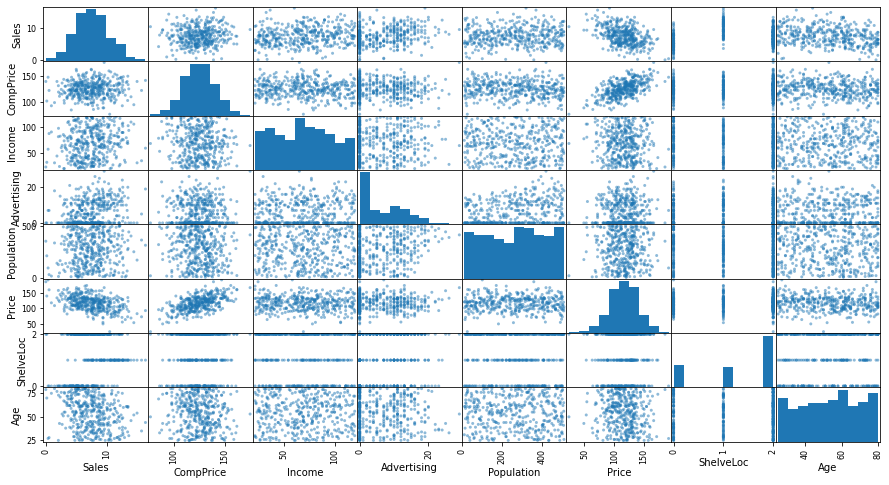

In [19]:
pd.plotting.scatter_matrix(data.iloc[:,:8],figsize=(15,8))

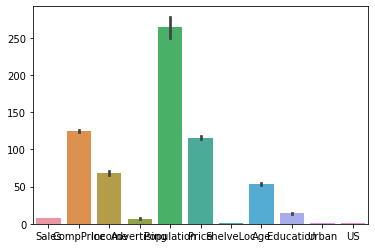

In [20]:
sns.barplot(data=data)

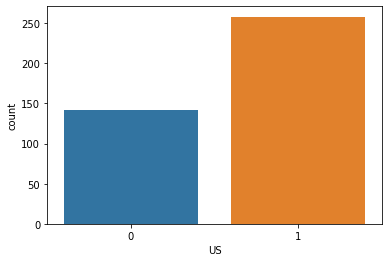

In [23]:
sns.countplot(x='US',data=data)

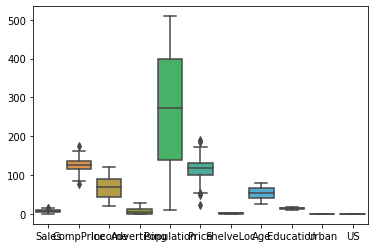

In [22]:
sns.boxplot(data=data)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


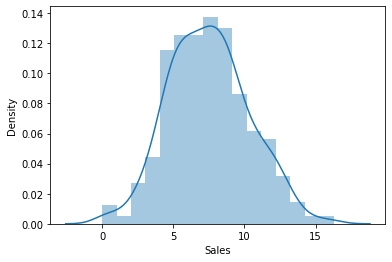

In [26]:
sns.distplot(data['Sales'])

In [85]:
x=data1.iloc[:,0:6]
y=data1.iloc[:,6]

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [87]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((280, 6), (120, 6), (280,), (120,))

In [88]:
x_train

,Sales,CompPrice,Income,Advertising,Population,Price
92,4.53,114,113,0,97,125
223,3.45,110,45,9,276,125
234,9.43,115,62,11,289,129
232,13.14,137,80,10,24,105
377,6.81,132,61,0,263,125
...,...,...,...,...,...,...
323,10.36,107,105,18,428,103
192,7.56,108,26,0,408,93
117,8.80,145,53,0,507,119
47,4.38,126,98,0,173,108


In [89]:
y_train

92     2
223    2
234    1
232    1
377    2
      ..
323    2
192    2
117    2
47     3
172    1
Name: ShelveLoc, Length: 280, dtype: int64

In [90]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'X[0] <= 6.165\nentropy = 1.432\nsamples = 280\nvalue = [54, 155, 71]'),
 Text(0.25, 0.625, 'X[2] <= 57.5\nentropy = 1.117\nsamples = 102\nvalue = [2, 47, 53]'),
 Text(0.125, 0.375, 'X[5] <= 99.5\nentropy = 0.91\nsamples = 40\nvalue = [0, 27, 13]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.1875, 0.125, 'entropy = 0.776\nsamples = 35\nvalue = [0, 27, 8]'),
 Text(0.375, 0.375, 'X[0] <= 3.525\nentropy = 1.094\nsamples = 62\nvalue = [2, 20, 40]'),
 Text(0.3125, 0.125, 'entropy = 0.391\nsamples = 13\nvalue = [0, 1, 12]'),
 Text(0.4375, 0.125, 'entropy = 1.18\nsamples = 49\nvalue = [2, 19, 28]'),
 Text(0.75, 0.625, 'X[0] <= 10.485\nentropy = 1.29\nsamples = 178\nvalue = [52, 108, 18]'),
 Text(0.625, 0.375, 'X[5] <= 97.5\nentropy = 1.154\nsamples = 138\nvalue = [23, 98, 17]'),
 Text(0.5625, 0.125, 'entropy = 1.043\nsamples = 37\nvalue = [1, 25, 11]'),
 Text(0.6875, 0.125, 'entropy = 1.059\nsamples = 101\nvalue = [22, 73, 6]'),
 Text(0.87

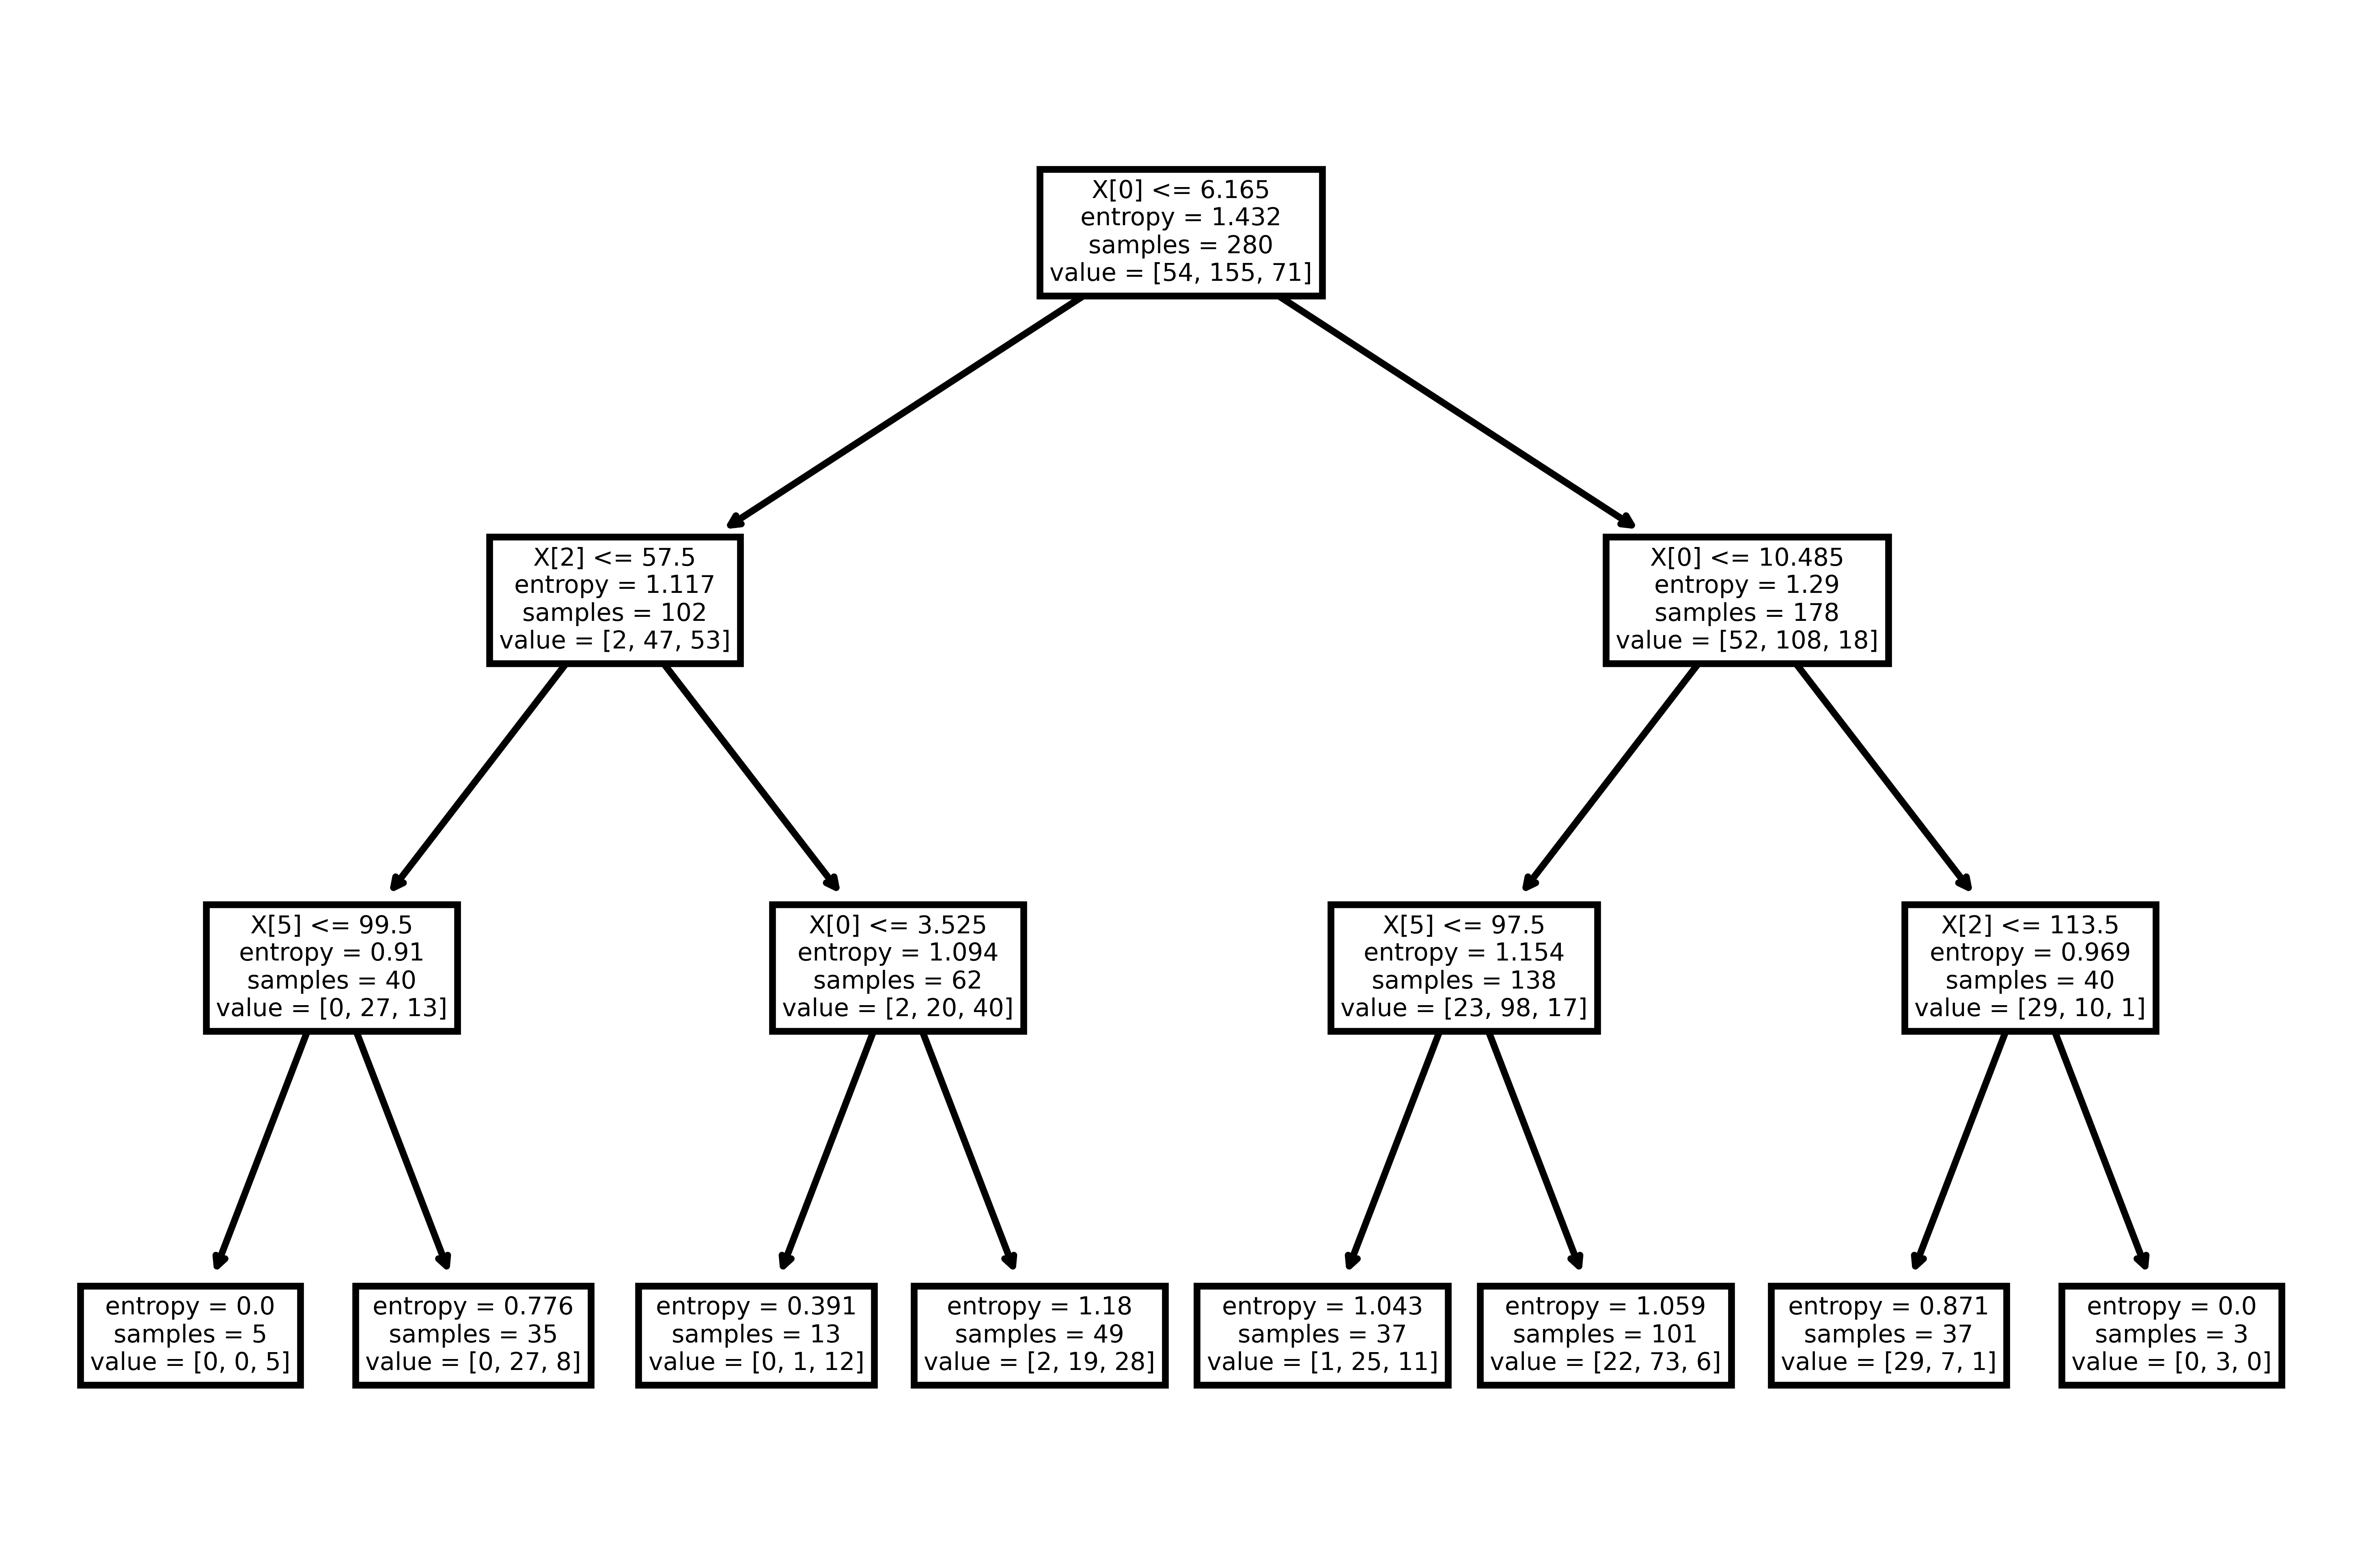

In [91]:
plt.figure(dpi=1200)
tree.plot_tree(model)

[Text(0.5, 0.875, 'Sales <= 6.165\nentropy = 1.432\nsamples = 280\nvalue = [54, 155, 71]\nclass = 2'),
 Text(0.25, 0.625, 'Income <= 57.5\nentropy = 1.117\nsamples = 102\nvalue = [2, 47, 53]\nclass = 3'),
 Text(0.125, 0.375, 'Price <= 99.5\nentropy = 0.91\nsamples = 40\nvalue = [0, 27, 13]\nclass = 2'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = 3'),
 Text(0.1875, 0.125, 'entropy = 0.776\nsamples = 35\nvalue = [0, 27, 8]\nclass = 2'),
 Text(0.375, 0.375, 'Sales <= 3.525\nentropy = 1.094\nsamples = 62\nvalue = [2, 20, 40]\nclass = 3'),
 Text(0.3125, 0.125, 'entropy = 0.391\nsamples = 13\nvalue = [0, 1, 12]\nclass = 3'),
 Text(0.4375, 0.125, 'entropy = 1.18\nsamples = 49\nvalue = [2, 19, 28]\nclass = 3'),
 Text(0.75, 0.625, 'Sales <= 10.485\nentropy = 1.29\nsamples = 178\nvalue = [52, 108, 18]\nclass = 2'),
 Text(0.625, 0.375, 'Price <= 97.5\nentropy = 1.154\nsamples = 138\nvalue = [23, 98, 17]\nclass = 2'),
 Text(0.5625, 0.125, 'entropy = 1.043\nsamples

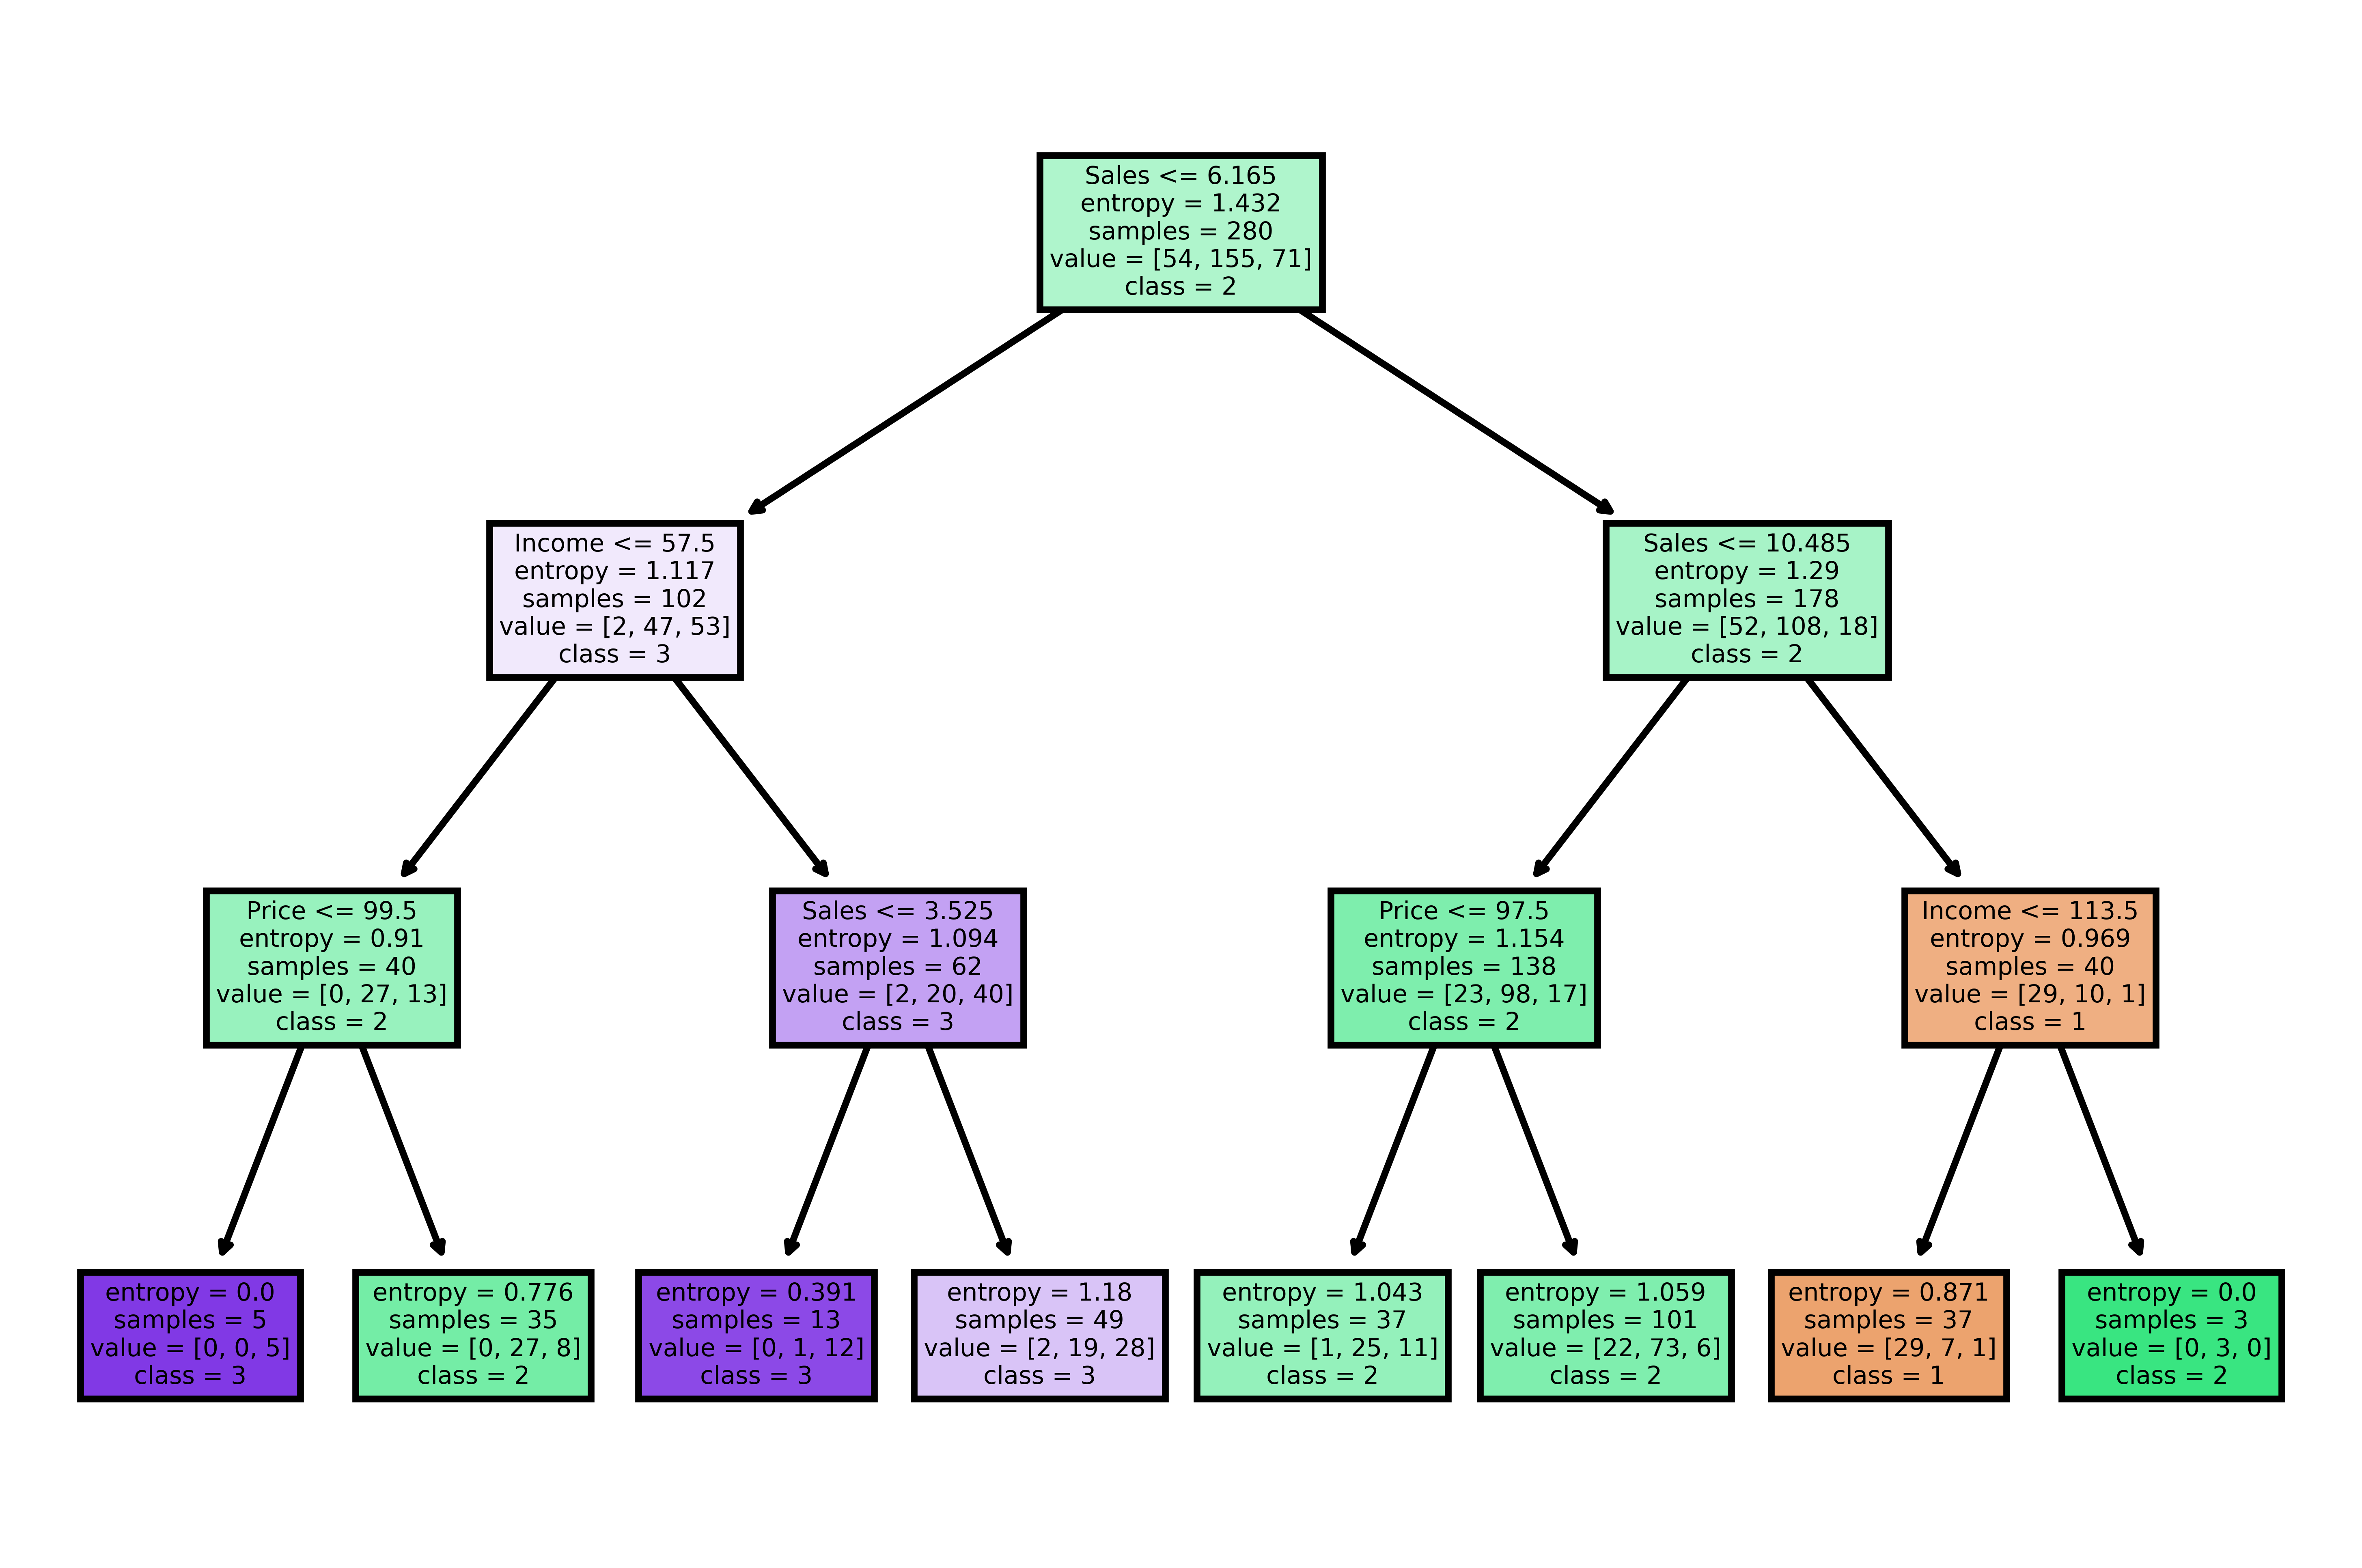

In [92]:
fn=['Sales','CompPrice','Income','Advertising	','Population','Price','Education	','Urban']
cn=['1','2','3']
plt.figure(dpi=1200)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [93]:
preds=model.predict(x_test)
preds

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 3, 1, 3, 3, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1,
       3, 3, 2, 2, 1, 2, 3, 2, 1, 1, 3, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 3,
       1, 1, 2, 2, 1, 2, 2, 3, 2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2])

In [94]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.67      0.45      0.54        31
           2       0.59      0.75      0.66        64
           3       0.35      0.24      0.29        25

    accuracy                           0.57       120
   macro avg       0.53      0.48      0.49       120
weighted avg       0.56      0.57      0.55       120



In [95]:
np.mean(preds==y_test)

0.5666666666666667

In [96]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini

DecisionTreeClassifier(max_depth=3)

In [97]:
preds=model.predict(x_test)
preds

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 3, 1, 3, 3, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1,
       3, 3, 2, 2, 1, 2, 3, 2, 1, 1, 3, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 3,
       1, 1, 2, 2, 1, 2, 2, 3, 2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2])

In [99]:
np.mean(y_test==preds)

0.5666666666666667

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
array=data1.values
x=array[:,0:6]
y=array[:,6]

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [105]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [106]:
model.score(x_test,y_test)

-0.11782971073704851